In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [7]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [8]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
import torch

In [10]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [13]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [14]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

在matplotlib中，`plt.text()`函数用于在图表的指定位置添加文本。该函数的前两个参数指定了文本在图表上的坐标位置。在这种情况下，`j`和`i`分别代表x轴和y轴的坐标。

在矩阵`N`中，元素的索引是按照[row, column]的顺序来访问的，也就是先行后列。所以`N[i, j]`中的`i`代表行索引，而`j`代表列索引。

当将这些值用作`plt.text()`函数的参数时，需要将它们反过来使用，因为在matplotlib的坐标系统中，第一个参数是横坐标（对应于列），第二个参数是纵坐标（对应于行）。因此，即使在矩阵索引中`i`代表行，`j`代表列，在绘图时我们需要反过来将它们传递为x（横坐标，列）和y（纵坐标，行）。

总结来说，矩阵索引和绘图坐标系统之间的这种差异是因为它们各自遵循的约定不同。在矩阵索引中，我们按行和列的顺序访问元素；而在绘图坐标中，我们按x（横向）和y（纵向）的顺序指定位置。

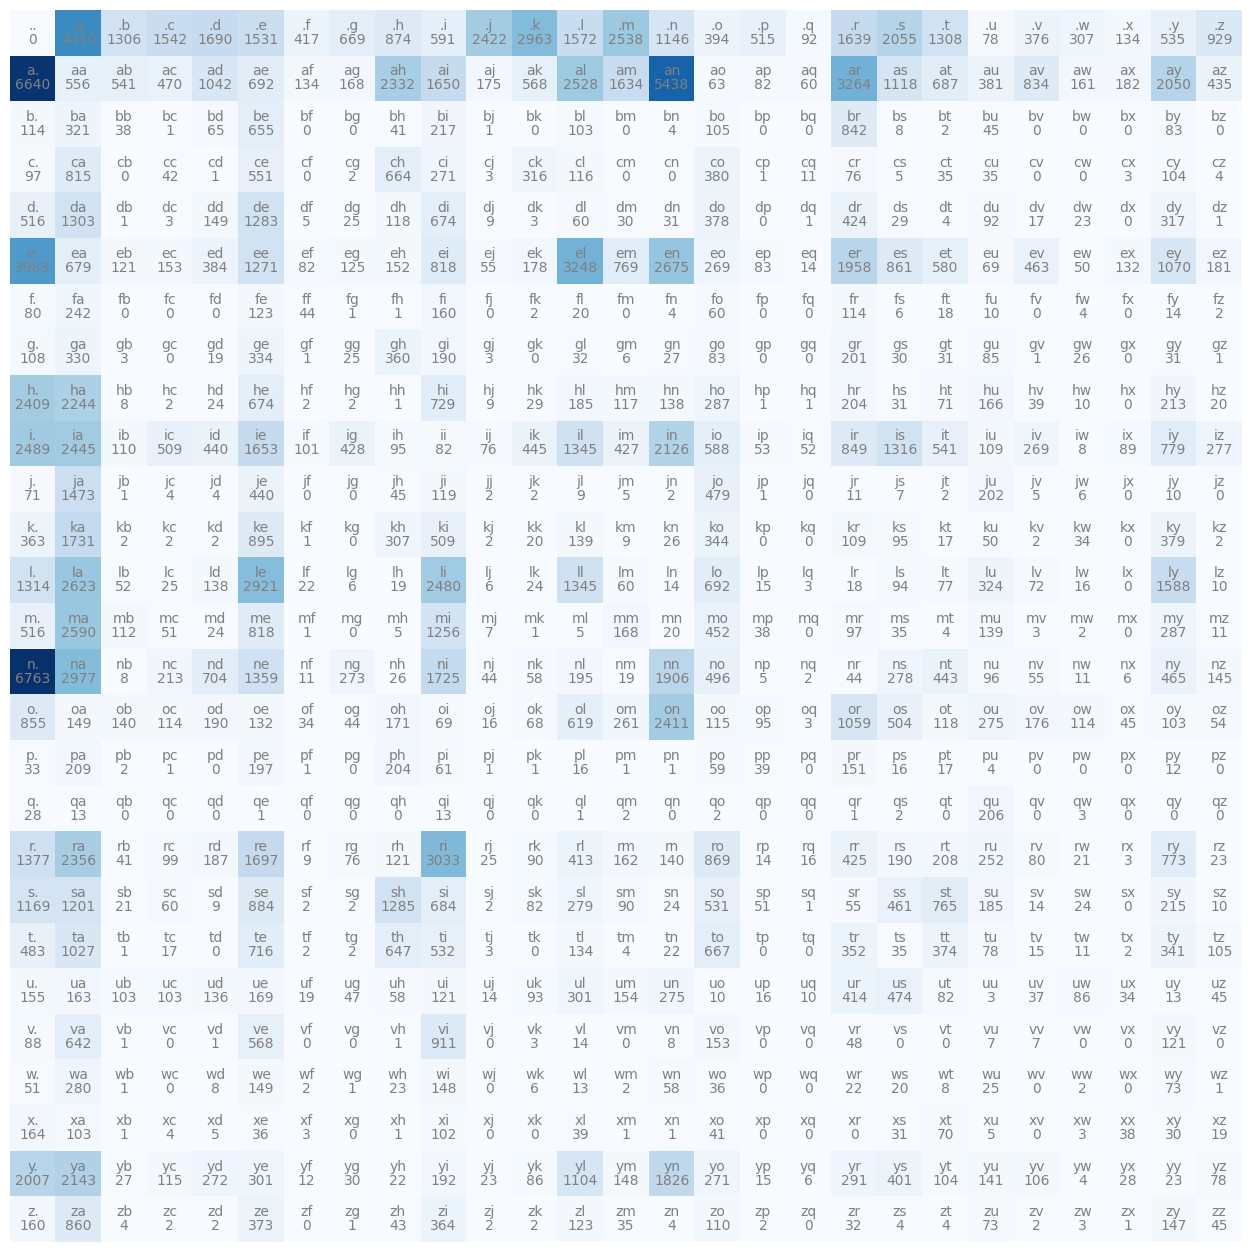

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
p.sum()

tensor(1.)

In [19]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

在这段代码中，`multinomial` 是 PyTorch 库中的一个函数，它属于 `torch` 模块。`torch.multinomial` 函数用于从给定的多项分布中抽取样本。多项分布是一种概率分布，它描述了在 n 个独立实验中，每个实验都有相同的一组概率，抽取各个可能结果的次数。

这里是 `torch.multinomial` 函数的参数解释：

- `p`: 概率分布向量，其中 `p[i]` 表示第 i 个事件的概率。
- `num_samples`: 要抽取的样本数量。
- `replacement`: 是否放回抽样。如果为 `True`，表示每次抽取后都会将样本放回，允许重复抽取；如果为 `False`，则不放回。
- `generator`: 一个随机数生成器对象，用于控制随机抽样过程。

在这段代码中，`torch.multinomial` 用于从经过归一化的概率分布 `p` 中随机抽取一个样本。`.item()` 方法是将抽取出来的 Tensor 转换为 Python 的标量（即一个单独的数字）。这个数字 `ix` 代表了被选中的事件的索引。

整个循环构造了一个输出序列 `out`，它不断地从概率分布 `p` 中抽取新的索引，并使用这些索引通过 `itos`（index to string）映射得到相应的字符或者其他对象，并将其添加到输出列表中。当抽取到的索引为 0 时，循环会终止，然后打印出通过连接列表中所有元素得到的字符串。这种方法通常用于生成序列数据，如文本生成等任务。

In [20]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)


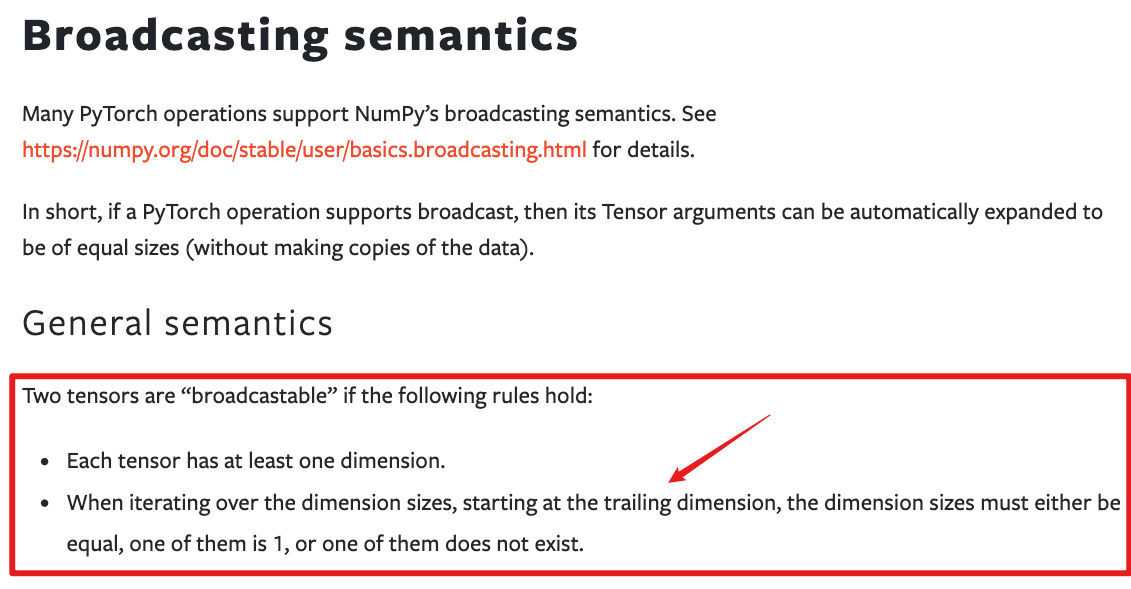

这句话中的 "starting at the trailing dimension" 指的是从数组或张量的最后一个维度开始考虑或迭代维度大小。在多维数组或张量中，"trailing dimension" 通常指的是最内层的维度，也就是最右边的维度（如果我们把维度大小写成一串数字的话）。

例如，假设有一个形状为 (4, 3, 2) 的三维张量，其中 4 是第一个维度的大小，3 是第二个维度的大小，2 是第三个（也就是最后一个，即trailing dimension）维度的大小。当进行维度迭代时，“从最后一个维度开始”意味着先考虑大小为 2 的维度，然后是大小为 3 的维度，最后是大小为 4 的维度。

这通常与广播（broadcasting）规则有关，在进行数组操作时，特别是在不同形状的数组之间进行操作时，需要考虑如何从各个维度的尺寸配对开始进行比较和匹配。按照这句话所述的规则，在比较维度时，要么对应的维度大小相等，要么其中一个是1（表示可以广播），或者对应位置上的维度不存在（通常意味着可以将其视为大小为1，并进行广播）。

In [21]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


在Python中，`print(f'{ch1=}')` 是使用了格式化字符串字面量（通常称为 f-string）。自Python 3.8起，它支持了一种新的写法，允许您在f-string中直接使用等号 `=` 来同时打印变量的名称和值。

这里是详细说明：

- `f` 前缀表示这是一个格式化字符串。
- `{ch1=}` 是格式化表达式，等号 `=` 会让Python打印出变量名 `ch1` 和它的值。

例如，如果变量 `ch1` 的值为 `'a'`，那么 `print(f'{ch1=}')` 将输出：

```
ch1='a'
```

这种格式特别有用于调试目的，因为它让您可以快速看到变量的名称和它的值，而不需要手动写出变量的名称。

In [22]:
print(f'{ch1=}')

ch1='x'


In [23]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood
# log(a*b*c) = log(a) + log(b) + log(c)

In [24]:
log_likelihood = 0.0
n = 0

# for w in words[:3]:
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [25]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [26]:
# create the training set of bigrams (x, y)
xs, ys = [], []
 
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
xenc.shape

torch.Size([5, 27])

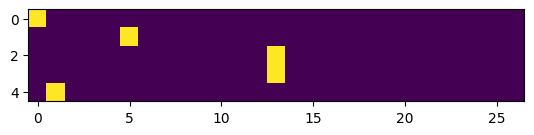

In [31]:
plt.imshow(xenc)

In [32]:
# always careful with data types
# 神经网络不希望进去的数值是integer，希望是floating numbers
xenc.dtype

torch.float32

In [33]:
W = torch.randn((27, 27))
W

tensor([[ 3.4536e-01,  8.0367e-01, -1.9584e+00,  2.9596e-02, -1.0090e+00,
         -2.9506e-01,  5.8686e-01,  5.9411e-01,  4.6336e-01,  1.0691e+00,
         -3.3027e-01, -1.5087e+00, -2.8297e+00,  7.1521e-01, -1.7008e+00,
          1.2835e-01, -4.2543e-01,  1.0755e-01, -8.4875e-01, -1.1744e+00,
         -3.2793e-02, -3.9129e-02, -9.3620e-01,  8.9244e-02, -1.9275e+00,
         -1.6567e+00, -1.1265e+00],
        [ 2.4102e+00, -3.4064e-01,  3.0691e-01,  3.6027e-01, -6.0743e-01,
         -8.3563e-02,  1.3752e+00,  1.1553e+00, -1.2270e+00, -6.9955e-01,
         -1.9138e+00, -4.6926e-01,  9.7764e-01, -6.6018e-01, -3.9370e-01,
         -7.3302e-01, -5.4287e-01,  1.0959e+00,  4.2233e-01, -1.5174e-01,
          2.2076e-01,  5.9114e-02,  3.1077e-01, -1.7646e+00,  1.0014e+00,
         -4.4631e-01, -1.2029e-01],
        [-4.7515e-01,  1.5190e-01,  1.9008e+00,  3.2217e-01, -1.9978e+00,
         -1.6257e+00, -8.5492e-01, -5.0191e-01, -5.2824e-03, -4.3364e-02,
         -9.0192e-01, -7.9964e-01,  6.44

In [34]:
(xenc @ W)[3]

tensor([ 1.5352,  0.3917, -0.4421, -1.6755,  1.1360,  1.6114,  1.4560, -1.5807,
         0.1753,  0.1609,  1.1600,  0.3990, -0.4921,  2.0836, -0.7828, -0.2046,
         0.4744, -2.1769, -0.6434, -1.1606, -0.2080, -0.5872,  0.3030, -2.3084,
         0.3186,  0.7406, -0.8215])

In [35]:
(xenc @ W)[3,13]

tensor(2.0836)

In [36]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
W[:,13]

tensor([ 0.7152, -0.6602, -1.8960, -0.1316, -1.6219,  0.0445,  2.1370,  0.5914,
         0.8675,  0.2854, -0.4993, -1.1602,  0.8014,  2.0836, -0.0645, -0.2377,
         0.8083, -2.6970,  0.4260, -2.1771, -1.8272, -0.7720, -0.2460, -0.8108,
        -1.0087, -0.9846,  0.3507])

In [38]:
(xenc[3] * W[:,13]).sum()

tensor(2.0836)

In [39]:
xenc.shape, W.shape

(torch.Size([5, 27]), torch.Size([27, 27]))

In [40]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0565, 0.0894, 0.0056, 0.0412, 0.0146, 0.0298, 0.0720, 0.0725, 0.0636,
         0.1166, 0.0288, 0.0089, 0.0024, 0.0818, 0.0073, 0.0455, 0.0262, 0.0446,
         0.0171, 0.0124, 0.0387, 0.0385, 0.0157, 0.0438, 0.0058, 0.0076, 0.0130],
        [0.0071, 0.0107, 0.0472, 0.0125, 0.2657, 0.0269, 0.0073, 0.0273, 0.0389,
         0.0204, 0.0647, 0.0034, 0.0023, 0.0333, 0.0371, 0.0085, 0.0240, 0.0180,
         0.0181, 0.0531, 0.0167, 0.0374, 0.0257, 0.0977, 0.0702, 0.0224, 0.0034],
        [0.1013, 0.0323, 0.0140, 0.0041, 0.0680, 0.1093, 0.0936, 0.0045, 0.0260,
         0.0256, 0.0696, 0.0325, 0.0133, 0.1753, 0.0100, 0.0178, 0.0351, 0.0025,
         0.0115, 0.0068, 0.0177, 0.0121, 0.0295, 0.0022, 0.0300, 0.0458, 0.0096],
        [0.1013, 0.0323, 0.0140, 0.0041, 0.0680, 0.1093, 0.0936, 0.0045, 0.0260,
         0.0256, 0.0696, 0.0325, 0.0133, 0.1753, 0.0100, 0.0178, 0.0351, 0.0025,
         0.0115, 0.0068, 0.0177, 0.0121, 0.0295, 0.0022, 0.0300, 0.0458, 0.0096],
        [0.2579, 0.0165,

In [41]:
probs[0].sum()

tensor(1.0000)

In [42]:
probs.shape

torch.Size([5, 27])

In [43]:
# (5, 27) @ (27, 27) => (5, 27)

# SUMMARY --------------------------------->>>>

xs

tensor([ 0,  5, 13, 13,  1])

In [44]:
ys

tensor([ 5, 13, 13,  1,  0])

In [45]:
# randomly initialize 27 neurons weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

probs.shape

torch.Size([5, 27])

torch.Size([5, 27])

In [46]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print('-----------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('===========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


-----------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
-----------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct char

In [47]:
# ------------ !!! OPTIMIZATION !!! yay ------------
xs

tensor([ 0,  5, 13, 13,  1])

In [48]:
ys

tensor([ 5, 13, 13,  1,  0])

In [49]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [50]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [51]:
# probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]
# probs[torch.arange(5), ys]

In [52]:
print(loss.item())

3.7693049907684326


In [53]:
# backward pass
W.grad = None # set to zero gradient
loss.backward()

In [54]:
W.data += -0.1 * W.grad

# 全文总结

In [55]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


Q: 什么是logits?

A: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow/52111173#52111173

当后续 neural network 越来越复杂的情况下，一路到 Transforms. 整体的训练结构是不变的

唯一优化的就是，我们做 Forward Pass 的逻辑；即我们那 Previous characters 然后 calculate logits for the next character in the sequence.
这个过程会变得更加 complex

In [56]:
当 W 全部是 0 的时候，logits.exp() 都是 1。probs 就是 uniform distribution;
即，把 W 推往 全是0的值，就等同于 Label smoothing

SyntaxError: invalid character '，' (U+FF0C) (1197373710.py, line 1)

0.01*(W**2).mean() 和 上文中的 P = (N+1).float(); P /= P.sum(1, keepdim=True) 中的 +1 效果类似
regularization倾向于让所有的 w 接近 0；
所有整个loss就包含两个部分：一方面由于regulaization，w倾向于都变成0，另一部分的neg log likelihood倾向于让 W 拟合 data

In [57]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() 
    print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad

3.768618583679199
3.3788065910339355
3.161090850830078
3.027186155319214
2.9344840049743652
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441699028015137
2.5413525104522705
2.538721799850464
2.536262035369873
2.5339579582214355
2.5317976474761963
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773027420044
2.521263837814331
2.519836902618408
2.5184860229492188
2.5172054767608643
2.5159904956817627
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081682205200195
2.507380247116

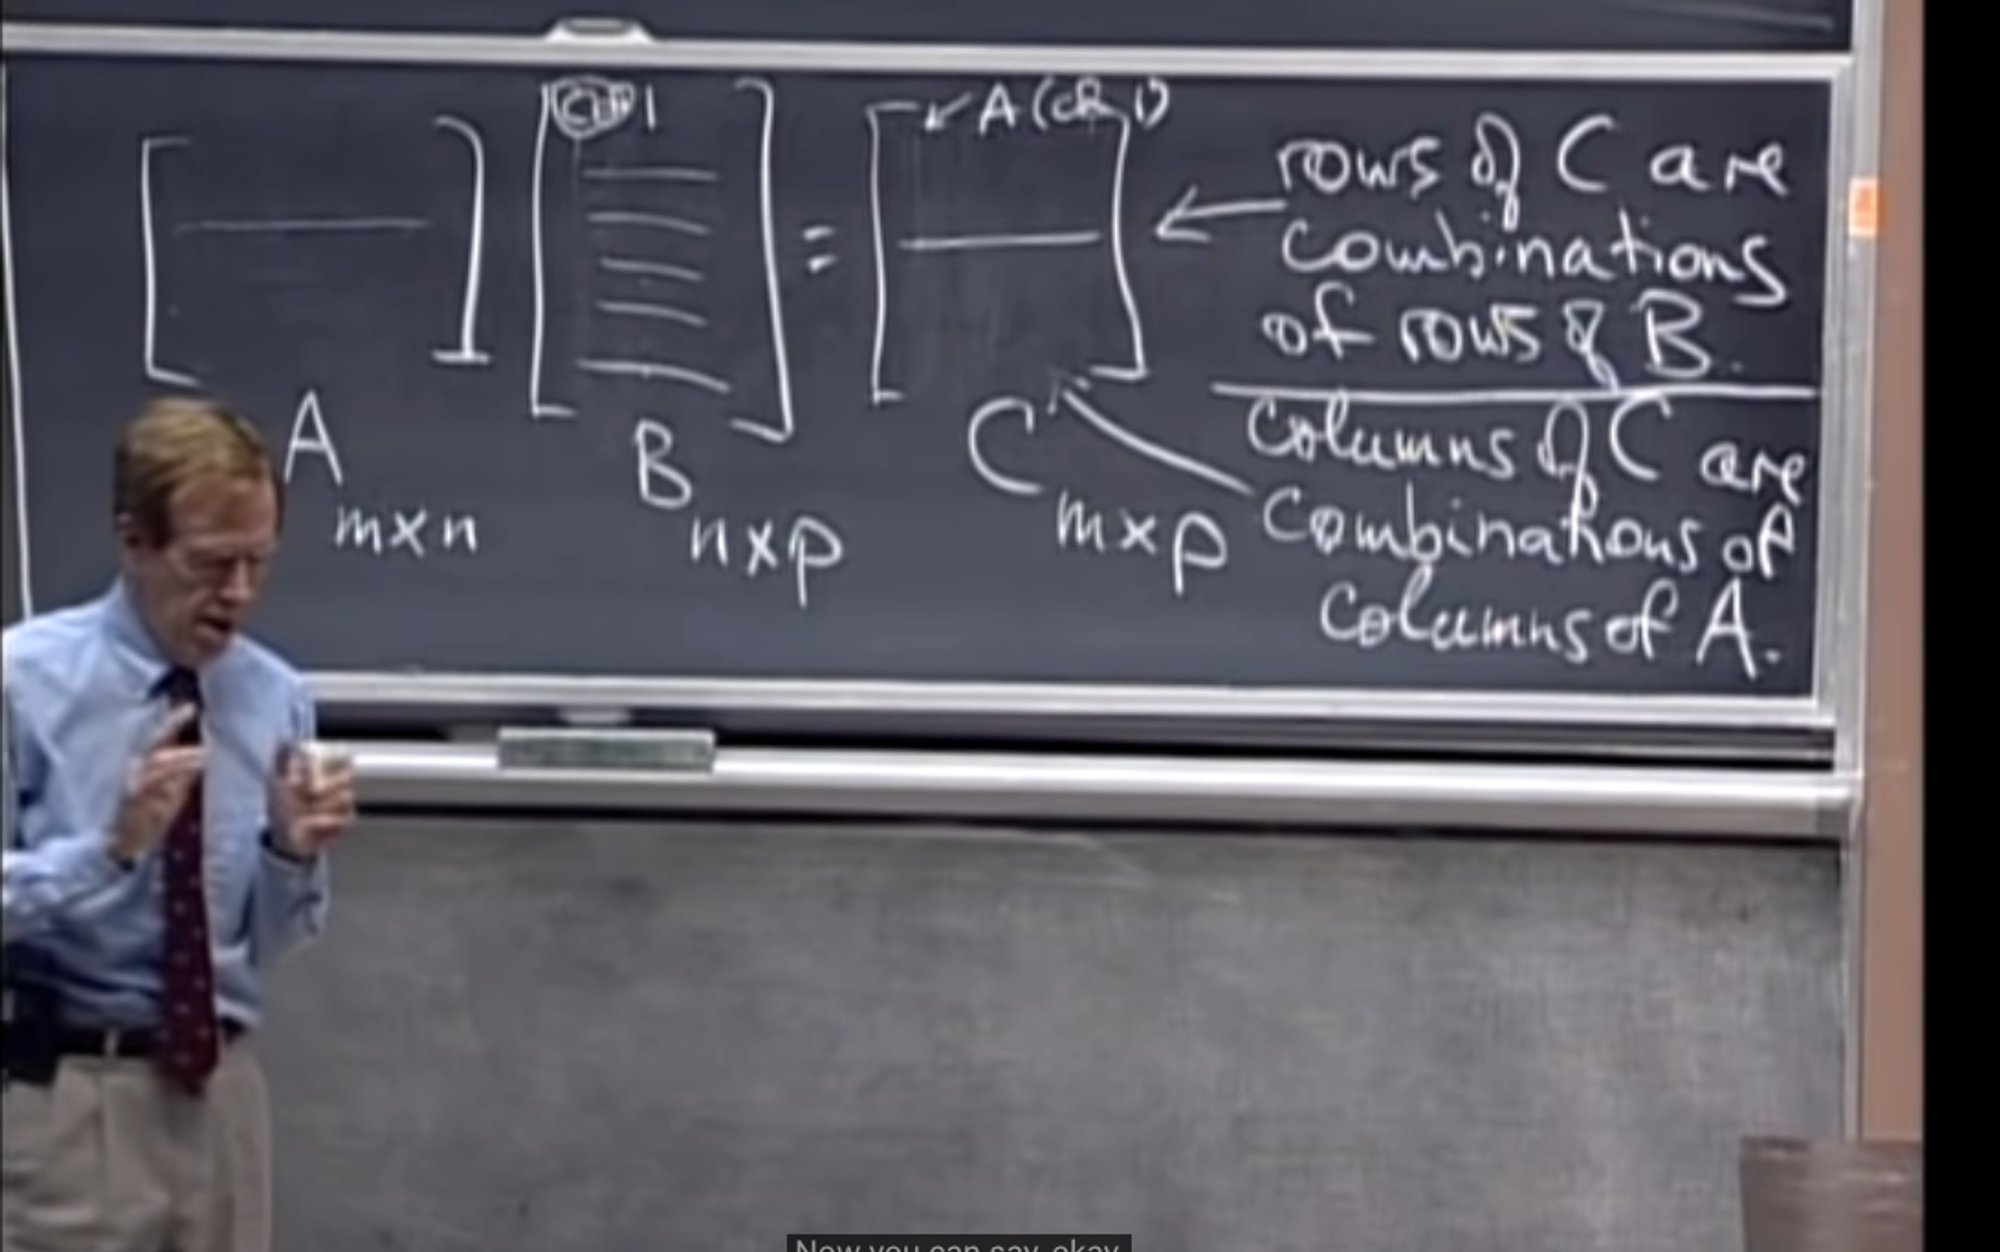

In [59]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # -------------
        # BEFORE:
        # p = P[ix]
        # -------------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        import pdb;pdb.set_trace()
        # 这里的 xenc (1,27) 是一个 row vector, W (27,27)，用行乘法的视角去看矩阵乘法；
        # 结果是 combinations of rows of W, determined by Xenc，而Xenc本身就是one hot，所以就相当于是拎出来了 hot encode 那一行
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # -------------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


> /var/folders/9s/7q1tkwtx6fg45lvq3qx60q3c0000gq/T/ipykernel_15437/1782780893.py(15)<module>()
     13         xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
     14         import pdb;pdb.set_trace()
---> 15         logits = xenc @ W # predict log-counts
     16         counts = logits.exp() # counts, equivalent to N
     17         p = counts / counts.sum(1, keepdims=True) # probabilities for next character



ipdb>  xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


ipdb>  xenc.shape


torch.Size([1, 27])


ipdb>  W.shape


torch.Size([27, 27])


ipdb>  n


> /var/folders/9s/7q1tkwtx6fg45lvq3qx60q3c0000gq/T/ipykernel_15437/1782780893.py(16)<module>()
     14         import pdb;pdb.set_trace()
     15         logits = xenc @ W # predict log-counts
---> 16         counts = logits.exp() # counts, equivalent to N
     17         p = counts / counts.sum(1, keepdims=True) # probabilities for next character
     18         # -------------



ipdb>  logits.shape


torch.Size([1, 27])


ipdb>  q
